# Analisi delle componenti principali {#sec-pca}

**Prerequisiti**

- Leggere il capitolo 6 *Factor Analysis and Principal Component Analysis* del testo di @petersen2024principles.

**Concetti e Competenze Chiave**

**Preparazione del Notebook**

In [8]:
# Carica il file _common.R per impostazioni di pacchetti e opzioni
here::here("code", "_common.R") |> source()
# Carica pacchetti aggiuntivi
pacman::p_load(car)
# Source function for centering and scaling
here::here("code", "centering_fun.R") |> source()

## Introduzione


In [1]:
# Set seed for reproducibility
set.seed(42)

# Generate low-dimensional data (100 samples, 4 features)
low_dim_data <- matrix(rnorm(100 * 4), nrow = 100, ncol = 4)

# Create a random projection matrix (4 features to 10 dimensions)
projection_matrix <- matrix(rnorm(4 * 10), nrow = 4, ncol = 10)

# Project the low-dimensional data to higher dimensions
high_dim_data <- low_dim_data %*% projection_matrix

# Add some noise to the high-dimensional data (mean = 0, sd = 0.5)
noise <- matrix(rnorm(100 * 10, mean = 0, sd = 0.5), nrow = 100, ncol = 10)
data_with_noise <- high_dim_data + noise

# Final dataset
X <- data_with_noise
dim(X)

[1] 100  10

In [6]:
# Centering the data
d <- center_scale_fun(as.data.frame(X))
glimpse(d)

Rows: 100
Columns: 10
$ V1  <dbl> 0.79830845, -1.00433616, 1.30470657, -0.75028521, 0.8997~
$ V2  <dbl> -1.6653391, -0.3781932, 0.7302653, -0.7831721, 0.3660202~
$ V3  <dbl> 0.55776155, -1.46988174, 0.20666721, -1.60882288, 0.7718~
$ V4  <dbl> -0.908530921, 0.140024125, -0.583579358, -2.462251348, -~
$ V5  <dbl> -0.43176870, 0.78169275, -0.85764270, -0.51563499, -0.13~
$ V6  <dbl> -1.05789333, -1.84912073, 1.35742748, -1.53575877, 0.267~
$ V7  <dbl> 1.36277503, -0.56497925, -0.74923127, -1.10699408, 1.004~
$ V8  <dbl> -2.1151922, 0.2432378, 1.2473972, 1.8040796, -1.2653123,~
$ V9  <dbl> -1.244881147, -0.848067192, 0.677545550, -1.686201351, 0~
$ V10 <dbl> -0.25498073, 0.75546897, -0.94741242, -1.27929795, 0.456~


In [15]:
set.seed(123456)
options(repr.plot.width = 8, repr.plot.height = 8)

npoints <- 20
x <- as.numeric(scale(rnorm(npoints, 0, 1)))
y <- as.numeric(scale(3 * x + rnorm(npoints, 0, 2)))
mean(x) |> print()
mean(y) |> print()
cov(cbind(x, y)) |> print()

[1] -2.775558e-17
[1] -7.771561e-17
          x         y
x 1.0000000 0.8291033
y 0.8291033 1.0000000


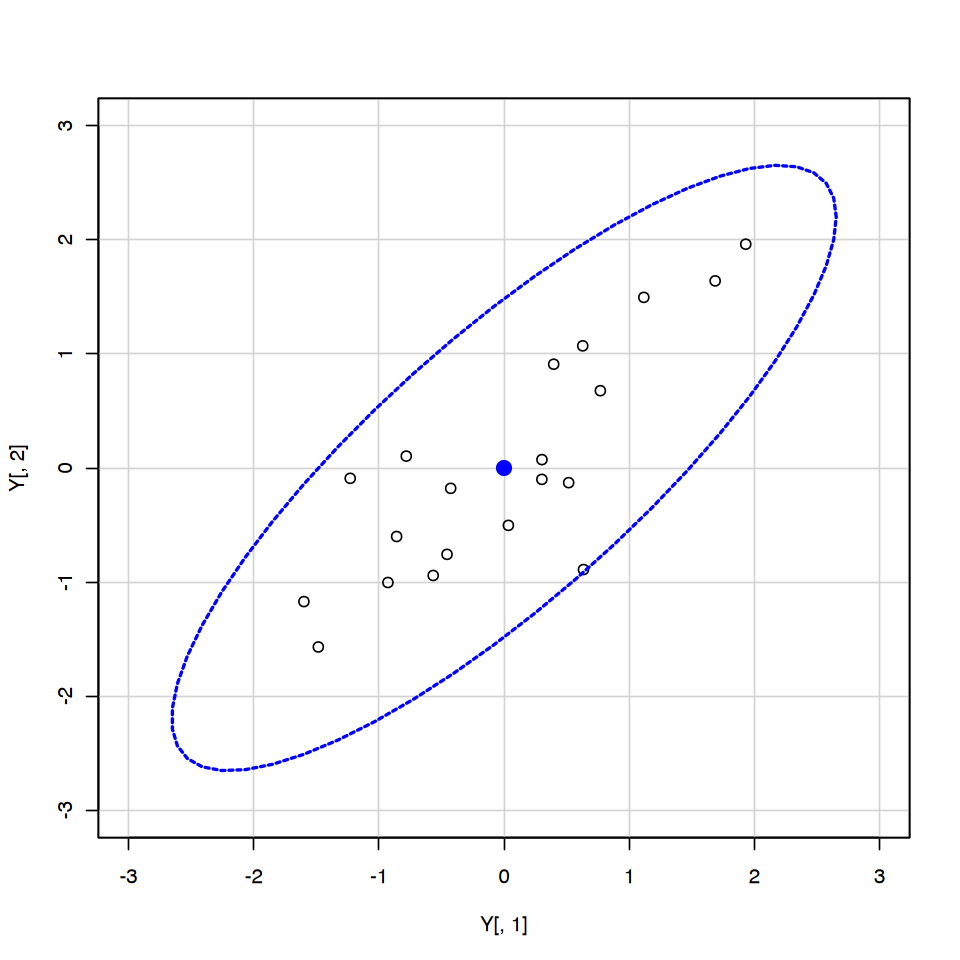

In [13]:
Y <- cbind(x, y)
car::dataEllipse(
    Y[, 1], Y[, 2],
    levels = 0.95,
    lty = 2,
    ylim = c(-3, 3),
    xlim = c(-3, 3)
)

In [14]:
s <- cov(Y)
ee <- eigen(s)
ee |> print()

eigen() decomposition
$values
[1] 1.8291033 0.1708967

$vectors
          [,1]       [,2]
[1,] 0.7071068 -0.7071068
[2,] 0.7071068  0.7071068



In [16]:
ee$values |> sum()

[1] 2

In [22]:
var(x) + var(y)

[1] 2

In [17]:
ee$values[1] / sum(ee$values)

[1] 0.9145517

In [18]:
# First eigenvector
ev_1 <- ee$vectors[, 1]

# Slope of the first eigenvector
ev1_m <- ev_1[2] / ev_1[1]

# Second eigenvector
ev_2 <- ee$vectors[, 2]

# Slope of the second eigenvector
ev2_m <- ev_2[2] / ev_2[1]

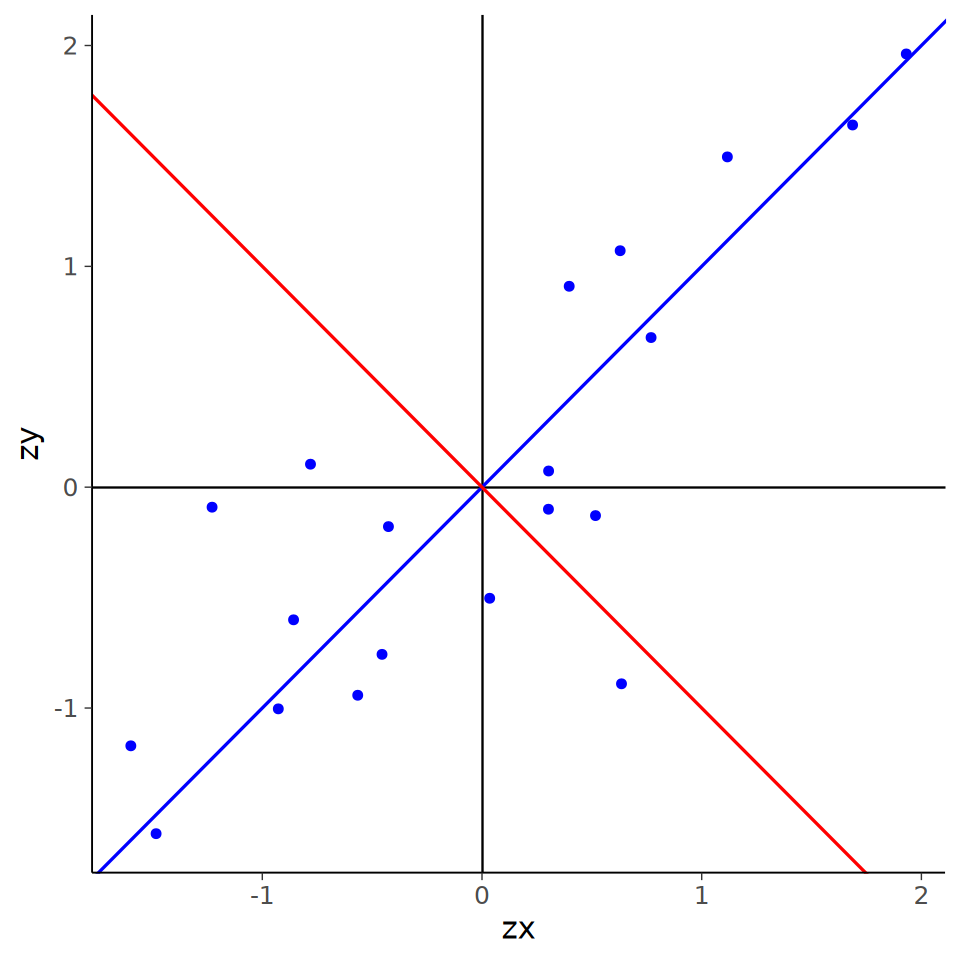

In [19]:
# Scatter plot showing the span of both eigenvectors
data.frame(zx = scale(x), zy = scale(y)) |>
    ggplot(aes(x = zx, y = zy)) +
    geom_point(color = "blue", size = 2) +
    geom_vline(xintercept = 0, linewidth = .5) +
    geom_hline(yintercept = 0, linewidth = .5) +
    geom_abline(slope = ev1_m, color = "blue", linewidth = 0.7) +
    geom_abline(slope = ev2_m, color = "red", linewidth = 0.7)

In [20]:
# Multiply both eigenvectors
print(ev_1 %*% ev_2)

             [,1]
[1,] 2.237114e-17


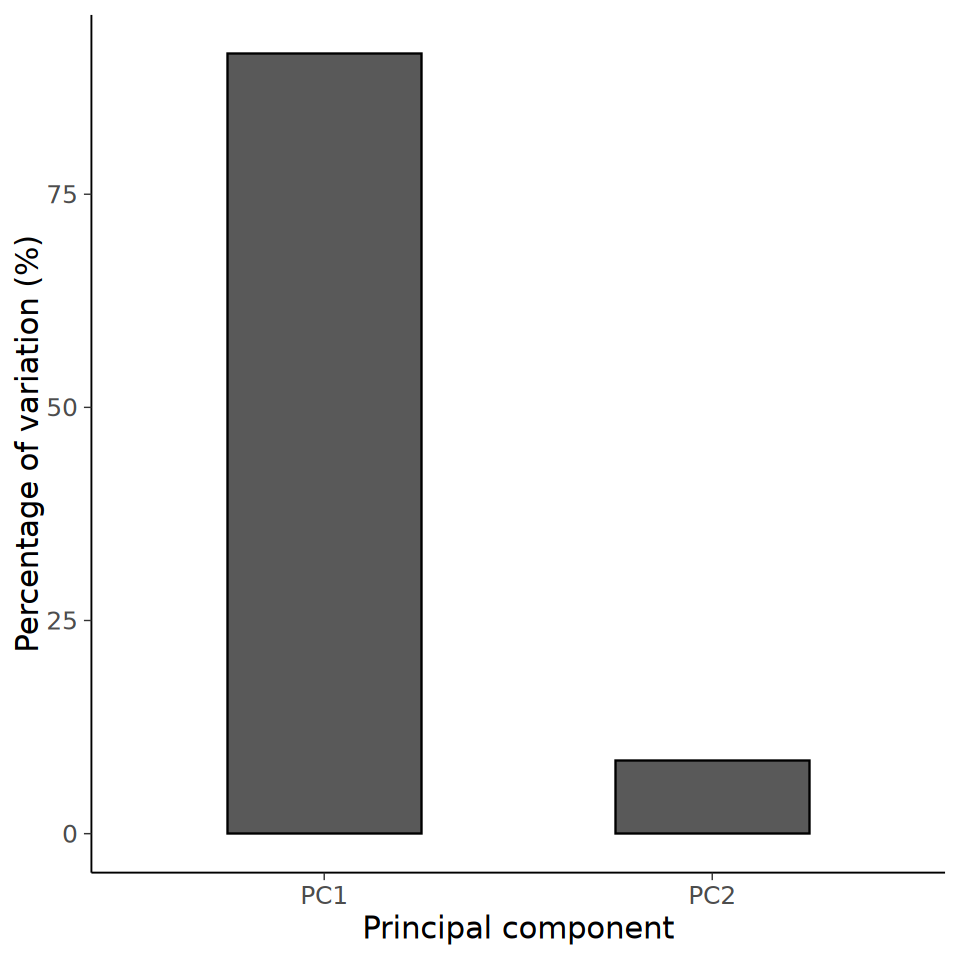

In [21]:
# Calculate the estimated variance for each eigenvalue
e_var <- ee$values / (length(x) - 1)

# Data frame with variance percentages
var_per <- tibble(
    PC  = c("PC1", "PC2"),
    PER = c(e_var) * 100 / sum(e_var) # Calculate the percentage
)

# Scree plot
ggplot(var_per, aes(x = PC, y = PER)) +
    geom_col(width = 0.5, color = "black") +
    xlab("Principal component") +
    ylab("Percentage of variation (%)")

In [23]:
t(as.matrix(ee$vectors[, 1])) %*% as.matrix(ee$vectors[, 1]) |> print()

     [,1]
[1,]    1


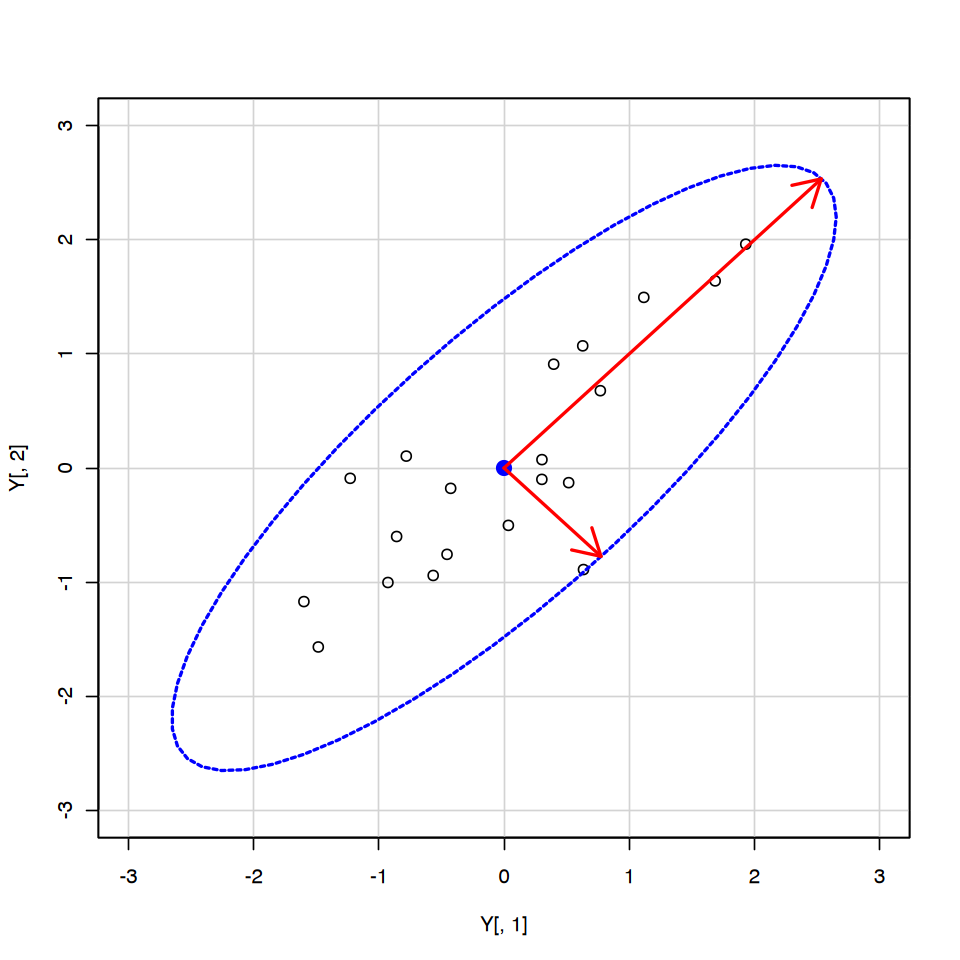

In [24]:
car::dataEllipse(
    Y[, 1], Y[, 2],
    levels = 0.95,
    lty = 2,
    ylim = c(-3, 3),
    xlim = c(-3, 3)
)
k <- 2.65
arrows(
    0, 0,
    k * sqrt(ee$values[1]) * ee$vectors[1],
    k * sqrt(ee$values[1]) * ee$vectors[2],
    code = 2,
    col = "red",
    lwd = 2
)
arrows(
    0, 0,
    k * sqrt(ee$values[2]) * ee$vectors[1],
    k * sqrt(ee$values[2]) * -ee$vectors[2],
    code = 2,
    col = "red",
    lwd = 2
)

## Session Info

In [51]:
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: aarch64-apple-darwin20
Running under: macOS 15.0.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.0

locale:
[1] C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods  
[7] base     

other attached packages:
 [1] lavaanExtra_0.2.1 lavaanPlot_0.8.1  kableExtra_1.4.0 
 [4] corrplot_0.94     nortest_1.0-4     MASS_7.3-61      
 [7] ggokabeito_0.1.0  viridis_0.6.5     viridisLite_0.4.2
[10] ggpubr_0.6.0      ggExtra_0.10.1    gridExtra_2.3    
[13] patchwork_1.3.0   bayesplot_1.11.1  semTools_0.5-6   
[16] semPlot_1.1.6     lavaan_0.6-19     psych_2.4.6.26   
[19] scales_1.3.0      markdown_1.13     knitr_1.48       
[22] lubridate_1.9.3   forcats_1.0.0     stringr_1.5.1    
[25] dplyr_1.1.